In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [5]:
test.head()

,discourse_id,essay_id,discourse_text,discourse_type
0,a261b6e14276,D72CB1C11673,Making choices in life can be very difficult. ...,Lead
1,5a88900e7dc1,D72CB1C11673,Seeking multiple opinions can help a person ma...,Position
2,9790d835736b,D72CB1C11673,it can decrease stress levels,Claim
3,75ce6d68b67b,D72CB1C11673,a great chance to learn something new,Claim
4,93578d946723,D72CB1C11673,can be very helpful and beneficial.,Claim


In [5]:
train.shape

(36765, 5)

In [6]:
test.shape

(10, 4)

In [6]:
train.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,0013cc385424,91B1F82B2CF1,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [7]:
train.describe().discourse_text['count'] - train.describe().discourse_text['unique']

74

In [8]:
train['discourse_type'].value_counts()

Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: discourse_type, dtype: int64

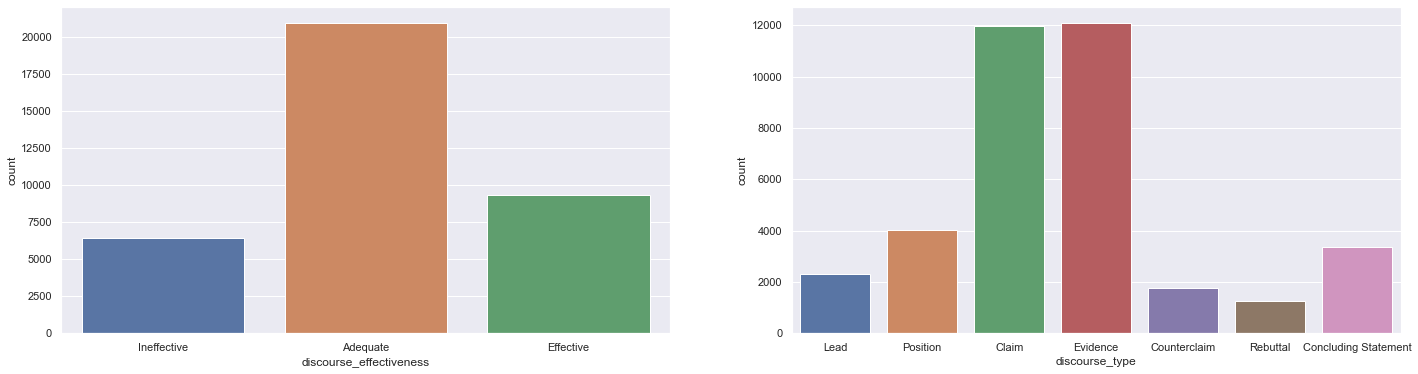

In [9]:
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.countplot(x='discourse_effectiveness', data=train, order=['Ineffective', 'Adequate', 'Effective'], ax=ax[0])
sns.countplot(x='discourse_type', data=train, ax=ax[1])
plt.show()

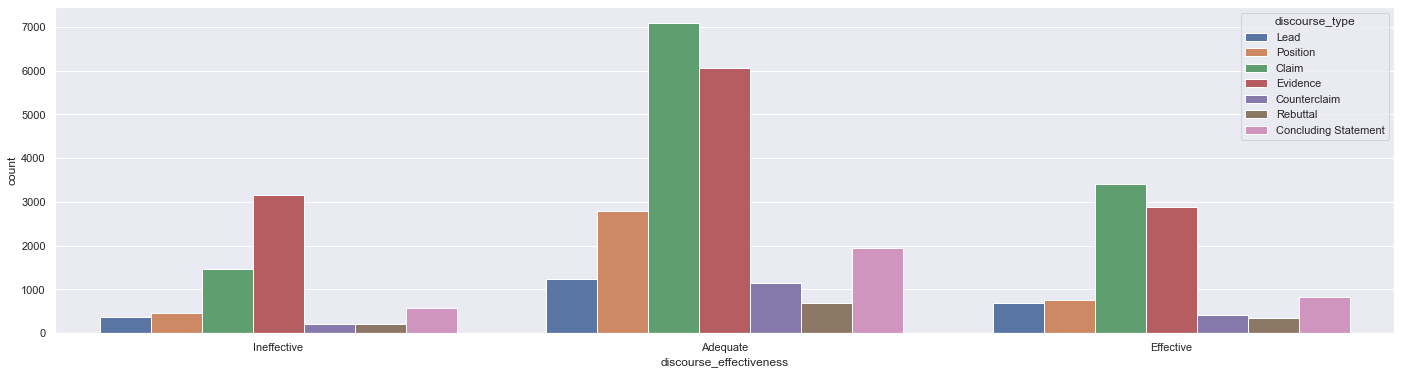

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

sns.countplot(x='discourse_effectiveness', data=train, hue='discourse_type',
             order=['Ineffective', 'Adequate', 'Effective'])

plt.show()

In [11]:
from nltk.corpus import stopwords

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simaranvohra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopWords = set(stopwords.words('english'))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
discourses = np.unique(train.discourse_type.values)
docs = train['discourse_text']

In [16]:
for discourse in discourses:
    print('For the discourse: ', discourse.upper())
    print('The top unigrams and bigrams are: ')
    
    title = '|Discourse effectiveness|Top unigrams|Top Bigrams|'
    subtitle = '|---------|'
    print(title)
    print(subtitle)
    
    for effectiveness in ['Ineffective', 'Adequate', 'Effective']:
        vect1 = TfidfVectorizer(ngram_range=(1, 1), stop_words=stopWords)
        vect2 = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopWords)
        
        docs = train.loc[(train.loc[:, 'discourse_type'] == discourse) & 
                         (train.loc[:, 'discourse_effectiveness'] == effectiveness), 'discourse_text'].values
        #print('Length of this subset: ', docs.shape)
        
        top_words = []
        for vect in [vect1, vect2]:
            tfidf = vect.fit_transform(docs)
            
            # converting that entire selection of the particular discourse and effectiveness combo 
            # into a single corpus and then transforming that into a sparse row
            
            sparse_row = vect.transform(['. '.join(docs)])
            
            # zipping word with the total occurence of the word in the corpus
            scores = dict(zip(vect.vocabulary_, np.array(sparse_row.sum(axis=0))[0]))
            
            sorted_score = sorted(scores.items(), key=lambda x: x[1], reverse=True)
            
            top_words.append(', '.join(x[0] for x in sorted_score[:10]))
            
        print(f'|{effectiveness}|{top_words[0]}|{top_words[1]}|')
    print('\n')
    print('------------------')
            
            
            

For the discourse:  CLAIM
The top unigrams and bigrams are: 
|Discourse effectiveness|Top unigrams|Top Bigrams|
|---------|
|Ineffective|staff, teach, mindset, convince, went, 90, nowadays, receives, yourselfs, activty|fun creative, people leave, put anything, author article, make gas, expression recognization, leave united, regard states, sending humans, able listen|
|Adequate|taping, unlike, setback, fasinated, usually, communit, cleary, wheather, closet, lives|art sport, future planning, think nt, usage like, work honestly, friends also, changing landforms, vote cannot, phyci well, kitchen table|
|Effective|fitness, ongoing, disorders, manufacturer, explanation, recognize, incredible, centuries, rate, initial|health responsibilty, certain independence, learning means, busier harder, firstly internet, subject want, grade would, unless certain, uncover information, forcing kids|


------------------
For the discourse:  CONCLUDING STATEMENT
The top unigrams and bigrams are: 
|Discourse

In [17]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/simaranvohra/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [18]:
# creating new features that might have distributions based on effectiveness

from nltk.corpus import words
english_dict = dict.fromkeys(words.words(), None)

In [19]:
import re

train.loc[:, 'len_discourse'] = train.loc[:, 'discourse_text'].apply(lambda x: len(x))
train.loc[:, 'num_words'] = train.loc[:, 'discourse_text'].apply(lambda x: len(x.split(' ')))

train.loc[:, 'num_long_words'] = train.loc[:, 'discourse_text'].apply(lambda x: len([word for word in x.split() if 
                                                                                     len(word) > 6]))
train.loc[:, 'num_sentences'] = train.loc[:, 'discourse_text'].apply(lambda x: len(x.replace('?', '.').replace('!', '.').split('.')))

train.loc[:, 'num_punctuation'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
train.loc[:, 'num_exclamations'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'\!', x)))
train.loc[:, 'num_interrogations'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'\?', x)))

train.loc[:, 'num_commas'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(',', x)))

train.loc[:, 'num_doublepoints'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(':', x)))
train.loc[:, 'num_digits'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'\d+', x)))

train.loc[:, 'num_mispelling'] = train.loc[:, 'discourse_text'].apply(lambda x: len([word for word in x.split()
                                                                                    if word not in english_dict]))

variables = train.columns[5:]


In [20]:
train.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,len_discourse,num_words,num_long_words,num_sentences,num_punctuation,num_exclamations,num_interrogations,num_commas,num_doublepoints,num_digits,num_mispelling
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,317,68,10,4,9,0,0,3,0,0,14
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,210,42,8,2,4,0,0,2,0,0,8
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,105,22,4,1,0,0,0,0,0,0,2
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,362,73,13,5,13,0,0,5,0,1,17
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,101,19,4,2,1,0,0,0,0,0,3


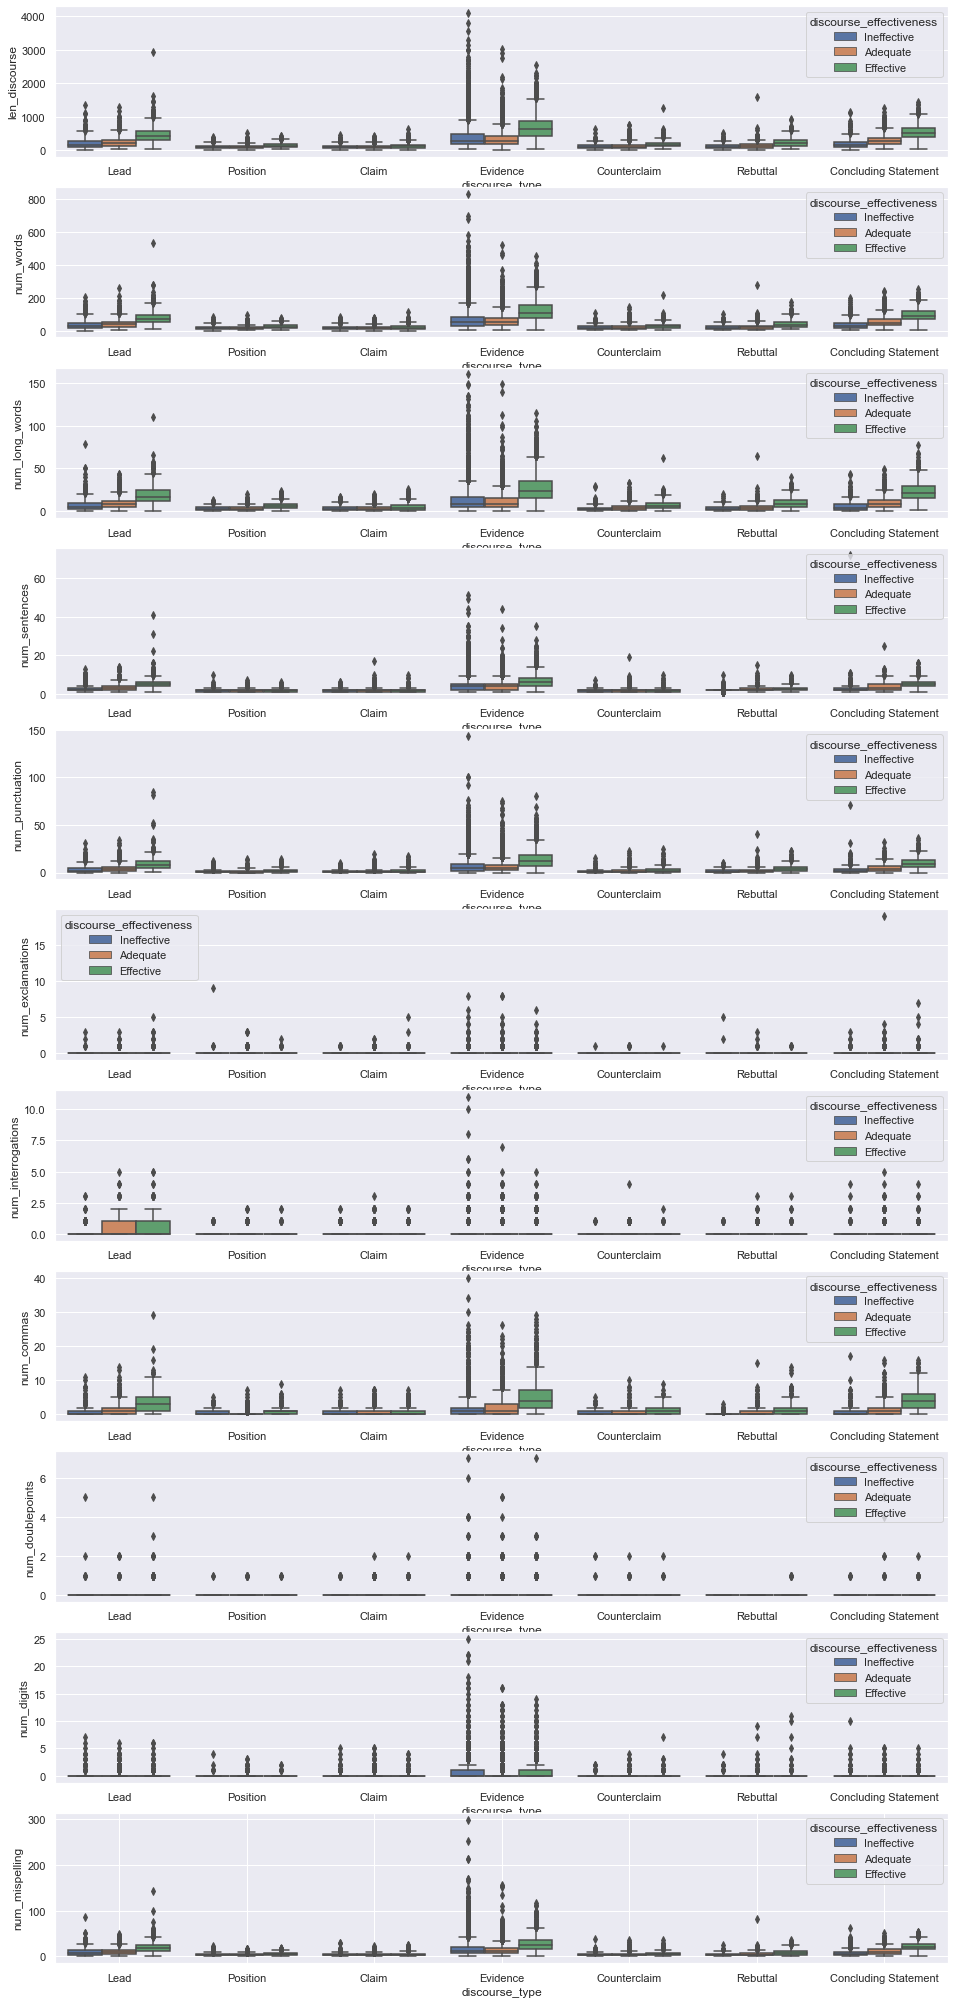

In [21]:
# now plotting the distributions of these new variables as a function of effectiveness

fig, ax = plt.subplots(nrows=len(variables), ncols=1, figsize=(16, 36))

for k, variable in enumerate(variables):
    sns.boxplot(data=train,
               y=variable,
               x='discourse_type',
               hue='discourse_effectiveness',
               hue_order=['Ineffective', 'Adequate', 'Effective'],
               ax=ax[k])
    plt.grid(True)
    
#plt.grid(True)
plt.show()

In [22]:
# Variables normalization

train.loc[:, 'ratio_long_words'] = train.loc[:, 'num_long_words']/train.loc[:, 'num_words']
train.loc[:, 'ratio_sentences'] = train.loc[:, 'num_sentences']/train.loc[:, 'num_words']
train.loc[:, 'ratio_mispelling'] = train.loc[:, 'num_mispelling']/train.loc[:, 'num_words']
train.loc[:, 'ratio_punctuation'] = train.loc[:, 'num_punctuation']/train.loc[:, 'num_words']

In [23]:
train.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,len_discourse,num_words,num_long_words,num_sentences,num_punctuation,num_exclamations,num_interrogations,num_commas,num_doublepoints,num_digits,num_mispelling,ratio_long_words,ratio_sentences,ratio_mispelling,ratio_punctuation
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,317,68,10,4,9,0,0,3,0,0,14,0.147059,0.058824,0.205882,0.132353
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,210,42,8,2,4,0,0,2,0,0,8,0.190476,0.047619,0.190476,0.095238
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,105,22,4,1,0,0,0,0,0,0,2,0.181818,0.045455,0.090909,0.000000
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,362,73,13,5,13,0,0,5,0,1,17,0.178082,0.068493,0.232877,0.178082
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,101,19,4,2,1,0,0,0,0,0,3,0.210526,0.105263,0.157895,0.052632


In [24]:
# creating a function to do those tasks

def feature_creation(data_):
    data = data_
    train.loc[:, 'len_discourse'] = train.loc[:, 'discourse_text'].apply(lambda x: len(x))
    train.loc[:, 'num_words'] = train.loc[:, 'discourse_text'].apply(lambda x: len(x.split(' ')))

    train.loc[:, 'num_long_words'] = train.loc[:, 'discourse_text'].apply(lambda x: len([word for word in x.split() if 
                                                                                         len(word) > 6]))
    train.loc[:, 'num_sentences'] = train.loc[:, 'discourse_text'].apply(lambda x: len(x.replace('?', '.').replace('!', '.').split('.')))

    train.loc[:, 'num_punctuation'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
    train.loc[:, 'num_exclamations'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'\!', x)))
    train.loc[:, 'num_interrogations'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'\?', x)))

    train.loc[:, 'num_commas'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(',', x)))

    train.loc[:, 'num_doublepoints'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(':', x)))
    train.loc[:, 'num_digits'] = train.loc[:, 'discourse_text'].apply(lambda x: len(re.findall(r'\d+', x)))

    train.loc[:, 'num_mispelling'] = train.loc[:, 'discourse_text'].apply(lambda x: len([word for word in x.split()
                                                                                        if word not in english_dict]))
    
    train.loc[:, 'ratio_long_words'] = train.loc[:, 'num_long_words']/train.loc[:, 'num_words']
    train.loc[:, 'ratio_sentences'] = train.loc[:, 'num_sentences']/train.loc[:, 'num_words']
    train.loc[:, 'ratio_mispelling'] = train.loc[:, 'num_mispelling']/train.loc[:, 'num_words']
    train.loc[:, 'ratio_punctuation'] = train.loc[:, 'num_punctuation']/train.loc[:, 'num_words']

    return data



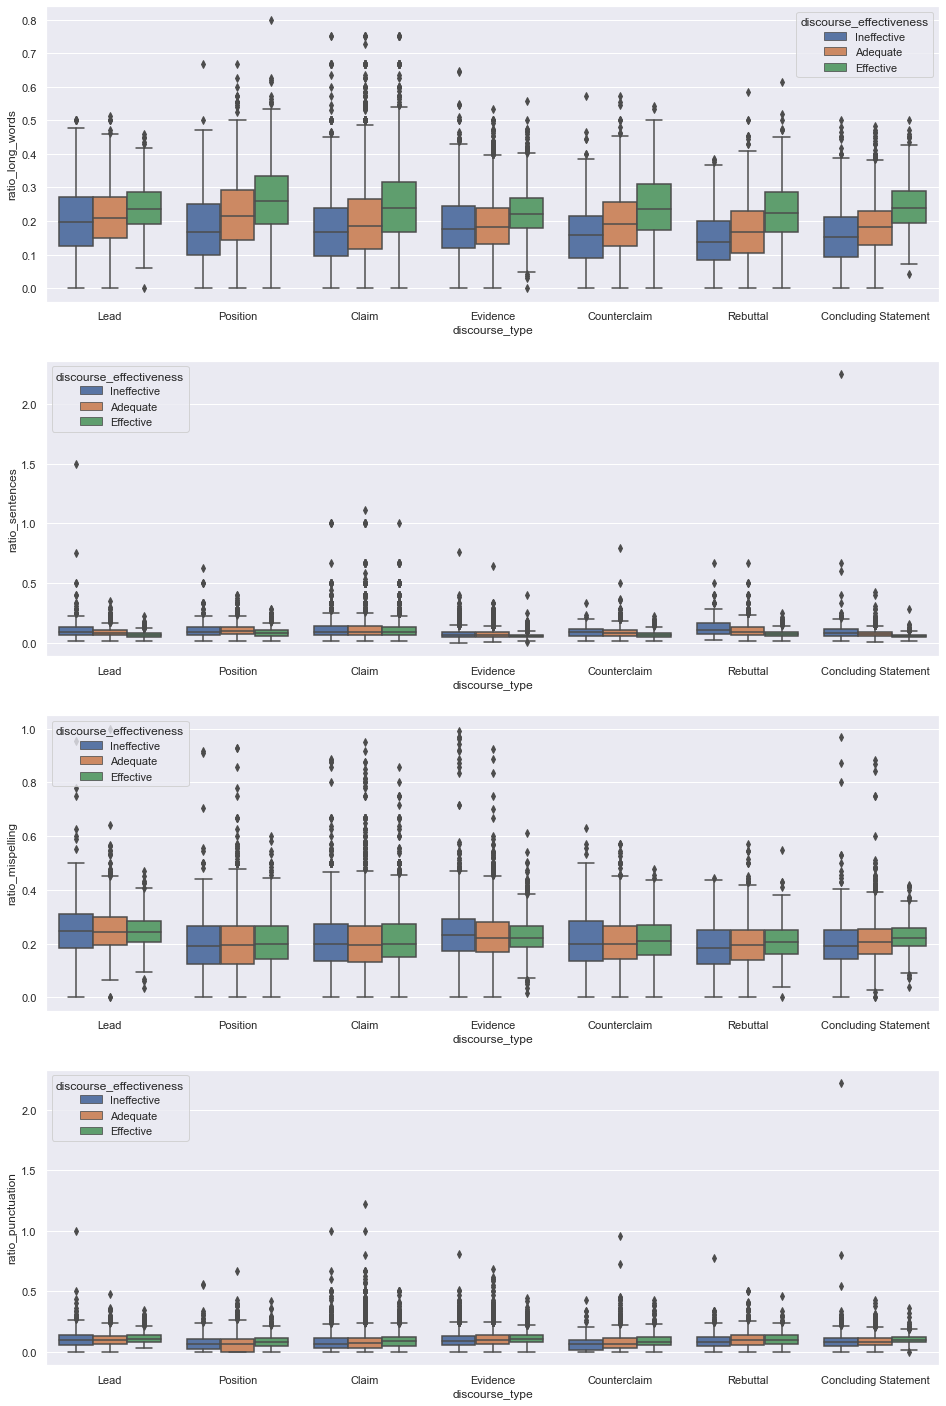

In [25]:
ratio_variables = ['ratio_long_words', 'ratio_sentences', 'ratio_mispelling', 'ratio_punctuation']
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 25))

for k, variable in enumerate(ratio_variables):
    sns.boxplot(data=train, 
               x='discourse_type',
               y=variable,
               hue='discourse_effectiveness',
               hue_order=['Ineffective', 'Adequate', 'Effective'],
               ax=ax[k])
    
plt.show()

In [26]:
# Logistic Model 

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder

In [59]:
# only transform one column and drop the rest
cols_trans_v1 = ColumnTransformer([
    ('vect_text', TfidfVectorizer(ngram_range=(1, 3), min_df=0.001), 'discourse_text')
], remainder='drop')

cols_trans_v2 = ColumnTransformer([
    ('features', StandardScaler(), ratio_variables)
], remainder='drop')

cols_trans_v3 = ColumnTransformer([
    ('vect_text', TfidfVectorizer(ngram_range=(1, 3), min_df=0.001), 'discourse_text'),
    ('features', StandardScaler(), ratio_variables)
])

cols_trans_v4 = ColumnTransformer([
    ('vect_text', TfidfVectorizer(ngram_range=(1, 3), min_df=0.001), 'discourse_text'),
    ('features', StandardScaler(), ratio_variables),
    ('cat', OneHotEncoder(), ['discourse_type'])
], remainder='drop')

In [60]:
clfs = {}

# creating many classifier that utilize the data from different transformers

clfs['LOG_v1'] = Pipeline([
    ('trans', cols_trans_v1),
    ('clf', LogisticRegression(random_state=42, multi_class='multinomial', class_weight='balanced', 
                              solver='newton-cg'))
])

clfs['LOG_v2'] = Pipeline([
    ('trans', cols_trans_v2),
    ('clf', LogisticRegression(random_state=42, multi_class='multinomial', class_weight='balanced',
                              solver='newton-cg'))
])

clfs['LOG_v3'] = Pipeline([
    ('trans', cols_trans_v3),
    ('clf', LogisticRegression(random_state=42, multi_class='multinomial', class_weight='balanced',
                              solver='newton-cg'))
])

clfs['LOG_v4'] = Pipeline([
    ('trans', cols_trans_v4),
    ('clf', LogisticRegression(random_state=42, multi_class='multinomial', class_weight='balanced',
                              solver='newton-cg'))
])

In [61]:
clfs

{'LOG_v1': Pipeline(steps=[('trans',
                  ColumnTransformer(transformers=[('vect_text',
                                                   TfidfVectorizer(min_df=0.001,
                                                                   ngram_range=(1,
                                                                                3)),
                                                   'discourse_text')])),
                 ('clf',
                  LogisticRegression(class_weight='balanced',
                                     multi_class='multinomial', random_state=42,
                                     solver='newton-cg'))]),
 'LOG_v2': Pipeline(steps=[('trans',
                  ColumnTransformer(transformers=[('features', StandardScaler(),
                                                   ['ratio_long_words',
                                                    'ratio_sentences',
                                                    'ratio_mispelling',
               

In [62]:
from tqdm import tqdm

In [63]:
mapping_target = {effectiveness:k for k, effectiveness in enumerate(['Ineffective', 'Adequate', 'Effective'])}

train['target'] = train['discourse_effectiveness'].apply(lambda x: mapping_target[x])

In [66]:
from sklearn.metrics import confusion_matrix

def metrics_report_cat3(target, preds, cats):
    indexes = [f'{cat}' for cat in cats]
    cm = confusion_matrix(target, preds)
    cm_df = pd.DataFrame(cm, index=indexes, columns=indexes)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    accuracy = np.sum(np.diag(cm)/np.sum(cm))
    recall = np.diag(cm) / np.sum(cm, axis=1)
    precision = np.diag(cm) / np.sum(cm, axis=1)
    f1 = 2*recall*precision/(recall*precision)
    
    print('Results model where accuracy is', accuracy)
    print('|Age group|Precision|Recall|F1|')
    print('--------------------------------')
    for k in range(recall.shape[0]):
        print(f'|{cm_df.index[k]}|{precision[k]:.02f}|{recall[k]:.02f}|{f1[k]:.02f}|')
    
    return None 

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(train, train['target'].values, test_size=0.33, random_state=13)

--------------LOG_v1--------------


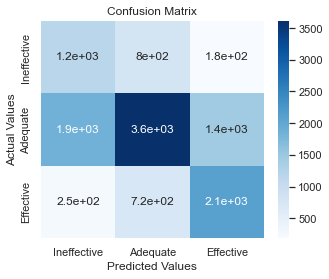

Results model where accuracy is 0.5664716063628121
|Age group|Precision|Recall|F1|
--------------------------------
|Ineffective|0.54|0.54|2.00|
|Adequate|0.52|0.52|2.00|
|Effective|0.68|0.68|2.00|

--------------LOG_v2--------------


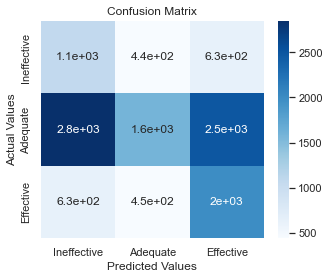

Results model where accuracy is 0.3829226077639496
|Age group|Precision|Recall|F1|
--------------------------------
|Ineffective|0.50|0.50|2.00|
|Adequate|0.23|0.23|2.00|
|Effective|0.65|0.65|2.00|

--------------LOG_v3--------------


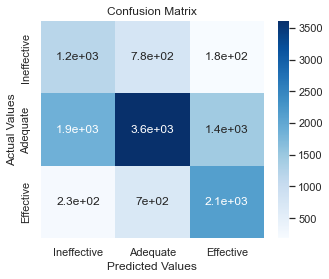

Results model where accuracy is 0.571251957471359
|Age group|Precision|Recall|F1|
--------------------------------
|Ineffective|0.55|0.55|2.00|
|Adequate|0.52|0.52|2.00|
|Effective|0.70|0.70|2.00|

--------------LOG_v4--------------


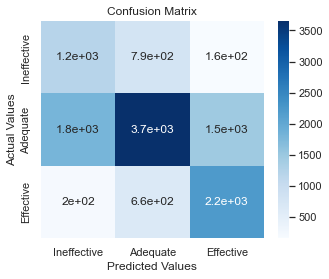

Results model where accuracy is 0.5826258963158328
|Age group|Precision|Recall|F1|
--------------------------------
|Ineffective|0.56|0.56|2.00|
|Adequate|0.53|0.53|2.00|
|Effective|0.72|0.72|2.00|



In [68]:
for key, clf in clfs.items():
    print(f'--------------{key}--------------')
    clf.fit(X_train, y_train)
    metrics_report_cat3(y_dev, clf.predict(X_dev), ['Ineffective', 'Adequate', 'Effective'])
    print()